# <center>Challenge 3<center>

<p>Team Name: Rock and Stone
<p>Student Names: Marco Figueroa and Oluwaseun Doherty
<p>Student W#s: 0730286 0745589

## Instructions
Do NOT hard-code a path or a header name unless otherwise said.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [521]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Prepare Data

<b>A. Create a data set with 100 feature vectors with the following attributes (features) as such:</b>

a1 is from a normal distribution N(mean=10,var=4)<br>
a2 is from a normal distribution N(mean=10,var=4)<br>
a3 is from a normal distribution N(mean=20,var=4)<br>
a4 is from a normal distribution N(mean=20,var=16)<br>
a5 is eqaul to 2*a2<br>
a6 is from a uniform distribution U(min=4,max=16)<br>
a7 is from a uniform distribution U(min=14,max=26)<br>
a8 is eqaul to 2*a7<br>
a9 is equal to a1 + a noise from a normal distribution N(0,0.25)<br>
a10 is equal to a7 + a noise from a normal distribution N(0,0.25)<br>
a11 is randomly selected from categories of {Y, N}. Categories have the same probability of occurence.<br>
a12 is from a nominal domain with categories of {H, C}. Categories have the same probability of occurence.

In [522]:
# generate same random points each time
np.random.seed(42)
SIZE = 100

# Initialize attributes
a1 = np.random.normal(10, 2, SIZE)
a2 = np.random.normal(10, 2, SIZE)
a3 = np.random.normal(20, 2, SIZE)
a4 = np.random.normal(20, 4, SIZE)
a5 = 2 * a2
a6 = np.random.uniform(4, 16, SIZE)
a7 = np.random.uniform(14, 26, SIZE)
a8 = 2 * a7
a9 = a1 + np.random.normal(0, math.sqrt(0.25), SIZE)
a10 = a7 + np.random.normal(0, math.sqrt(0.25), SIZE)

a11 = np.random.choice(['Y', 'N'], SIZE)
a12 = np.random.choice(['H','C'], SIZE)




## Explore Data

Plot Box-Whisker in the same chart

In [523]:
data = {'a1': a1, 'a2':a2, 'a3':a3, 'a4':a4, 'a5':a5, 'a6':a6, 'a7':a7, 'a8':a8, 'a9':a9, 'a10':a10, 'a11':a11, 'a12':a12}
df = pd.DataFrame(data)

<Axes: >

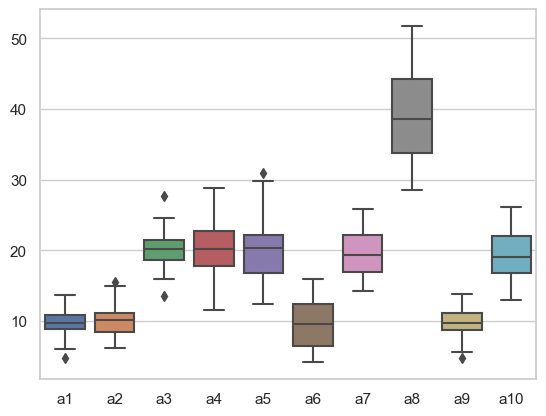

In [524]:
# Each box alongside each other
sns.set(style="whitegrid")
sns.boxplot(df)

Plot histogram of each attribute in the same figure on separate sub-charts. Use equal-width discretization.

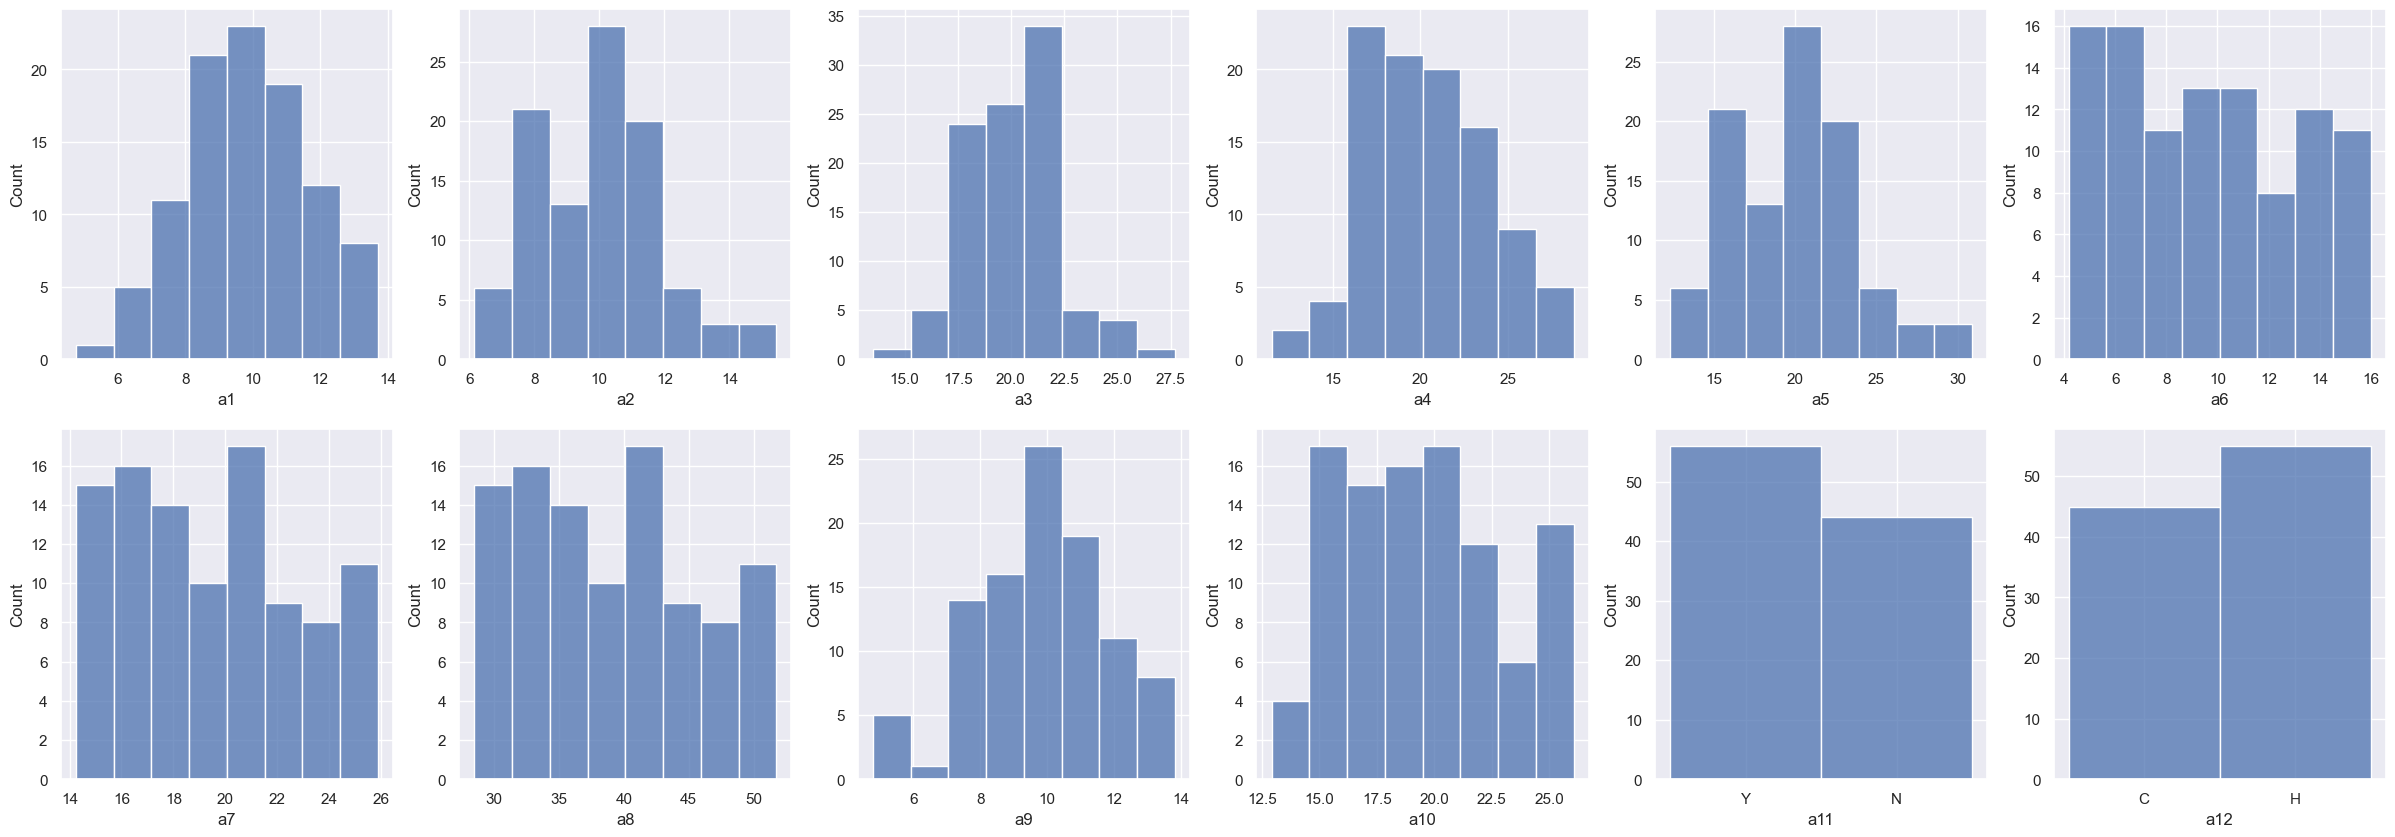

In [525]:

sns.set()
fig, axes = plt.subplots(2,6, figsize=(30,10))

sns.histplot(data =df,bins=8, x='a1', ax=axes[0,0])
sns.histplot(data =df,bins=8, x='a2', ax=axes[0,1])
sns.histplot(data =df,bins=8, x='a3', ax=axes[0,2])
sns.histplot(data =df,bins=8, x='a4', ax=axes[0,3])
sns.histplot(data =df,bins=8, x='a5', ax=axes[0,4])
sns.histplot(data =df,bins=8, x='a6', ax=axes[0,5])
sns.histplot(data =df,bins=8, x='a7', ax=axes[1,0])
sns.histplot(data =df,bins=8, x='a8', ax=axes[1,1])
sns.histplot(data =df,bins=8, x='a9', ax=axes[1,2])
sns.histplot(data =df,bins=8, x='a10', ax=axes[1,3])
sns.histplot(data =df, x='a11', ax=axes[1,4])
sns.histplot(data =df, x='a12', ax=axes[1,5])

plt.show()


## Smoothing

Smooth by bin means

In [526]:

num_bins = 8
smoothed_df_by_mean = df.copy() # Create a copy of the original to avoid changing it

for col in smoothed_df_by_mean.columns:
    # Don't go into columns with categorical values
    if col != "a11" and col != "a12":
        # Perform data binning in the current column
        smoothed_df_by_mean[col + "_bins"] = pd.cut(smoothed_df_by_mean[col],bins=num_bins)
        # Group by the bins of the current column and replace the values with their respective bin's mean
        smoothed_df_by_mean[col + "_smoothed"] = smoothed_df_by_mean.groupby(col + "_bins")[col].transform("mean")
        # drop the _bins column since we don't need it
        smoothed_df_by_mean.drop(columns = col + "_bins", inplace=True)


smoothed_df_by_mean


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a1_smoothed,a2_smoothed,a3_smoothed,a4_smoothed,a5_smoothed,a6_smoothed,a7_smoothed,a8_smoothed,a9_smoothed,a10_smoothed
0,10.993428,7.169259,20.715575,16.684020,14.338517,8.977834,19.550417,39.100833,11.162230,20.837096,...,10.748903,6.863671,21.428677,17.009745,13.727342,9.410762,19.325954,38.651908,11.003215,20.534606
1,9.723471,9.158709,21.121569,17.759276,18.317419,7.280885,22.969651,45.939303,9.517533,22.999260,...,9.773296,9.126817,21.428677,17.009745,18.253634,7.997042,22.471218,44.942436,9.736920,23.556930
2,11.295377,9.314571,22.166102,22.989174,18.629142,4.676506,14.440198,28.880397,11.051574,14.447163,...,10.748903,9.126817,21.428677,23.180386,18.253634,5.033464,15.077990,30.155980,11.003215,13.982900
3,13.046060,8.395445,22.107604,22.441481,16.790891,14.376669,17.029243,34.058487,12.829781,17.017181,...,13.089246,7.984425,21.428677,23.180386,15.968851,13.801102,16.483626,32.967252,13.173302,17.006701
4,9.531693,9.677429,17.244661,19.916394,19.354857,13.754812,22.560195,45.120390,9.728919,22.659237,...,9.773296,10.301559,18.139213,19.320366,20.603119,13.801102,22.471218,44.942436,9.736920,22.100580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.072970,10.770635,18.614181,18.123297,21.541270,6.512192,16.174797,32.349594,7.421073,15.471466,...,7.481419,10.301559,18.139213,19.320366,20.603119,6.338340,16.483626,32.967252,7.583455,15.388618
96,10.592241,8.232285,21.799200,13.147462,16.464570,8.445665,14.797955,29.595910,11.516719,14.336339,...,10.748903,7.984425,21.428677,12.325939,15.968851,7.997042,15.077990,30.155980,11.003215,13.982900
97,10.522111,10.307450,20.614599,25.415489,20.614900,9.814276,22.893448,45.786896,11.085393,22.217605,...,10.748903,10.301559,21.428677,25.320721,20.603119,9.410762,22.471218,44.942436,11.003215,22.100580
98,10.010227,10.116417,21.625724,19.541841,20.232835,11.419057,20.893677,41.787355,9.875783,20.405741,...,9.773296,10.301559,21.428677,19.320366,20.603119,10.946624,20.723924,41.447847,9.736920,20.534606


Smooth by bin median

In [527]:

smoothed_df_by_median = df.copy() # Create a copy of the original to avoid changing it

for col in smoothed_df_by_median.columns:
    # Don't go into columns with categorical values
    if col != "a11" and col != "a12":
        # Perform data binning in the current column
        smoothed_df_by_median[col + "_bins"] = pd.cut(smoothed_df_by_median[col],bins=num_bins)
        # Group by the bins of the current column and replace the values with their respective bin's median
        smoothed_df_by_median[col + "_smoothed"] = smoothed_df_by_median.groupby(col + "_bins")[col].transform("median")
        # drop the _bins column since we don't need it
        smoothed_df_by_median.drop(columns = col + "_bins", inplace=True)

        
smoothed_df_by_median


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a1_smoothed,a2_smoothed,a3_smoothed,a4_smoothed,a5_smoothed,a6_smoothed,a7_smoothed,a8_smoothed,a9_smoothed,a10_smoothed
0,10.993428,7.169259,20.715575,16.684020,14.338517,8.977834,19.550417,39.100833,11.162230,20.837096,...,10.687237,6.934489,21.341728,16.907961,13.868979,9.509629,19.274431,38.548863,11.051574,20.661929
1,9.723471,9.158709,21.121569,17.759276,18.317419,7.280885,22.969651,45.939303,9.517533,22.999260,...,9.723471,9.158709,21.341728,16.907961,18.317419,8.179066,22.560195,45.120390,9.683532,23.622911
2,11.295377,9.314571,22.166102,22.989174,18.629142,4.676506,14.440198,28.880397,11.051574,14.447163,...,10.687237,9.158709,21.341728,23.210345,18.317419,5.022769,15.221390,30.442779,11.051574,14.284534
3,13.046060,8.395445,22.107604,22.441481,16.790891,14.376669,17.029243,34.058487,12.829781,17.017181,...,13.061066,8.050637,21.341728,23.210345,16.101273,13.714614,16.390951,32.781901,13.184853,17.017181
4,9.531693,9.677429,17.244661,19.916394,19.354857,13.754812,22.560195,45.120390,9.728919,22.659237,...,9.723471,10.359212,18.280549,19.411770,20.718423,13.714614,22.560195,45.120390,9.683532,22.096484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.072970,10.770635,18.614181,18.123297,21.541270,6.512192,16.174797,32.349594,7.421073,15.471466,...,7.558313,10.359212,18.280549,19.411770,20.718423,6.260860,16.390951,32.781901,7.559527,15.471466
96,10.592241,8.232285,21.799200,13.147462,16.464570,8.445665,14.797955,29.595910,11.516719,14.336339,...,10.687237,8.050637,21.341728,12.325939,16.101273,8.179066,15.221390,30.442779,11.051574,14.284534
97,10.522111,10.307450,20.614599,25.415489,20.614900,9.814276,22.893448,45.786896,11.085393,22.217605,...,10.687237,10.359212,21.341728,25.221915,20.718423,9.509629,22.560195,45.120390,11.051574,22.096484
98,10.010227,10.116417,21.625724,19.541841,20.232835,11.419057,20.893677,41.787355,9.875783,20.405741,...,9.723471,10.359212,21.341728,19.411770,20.718423,11.079012,20.849340,41.698679,9.683532,20.661929


Smooth by the kernel [1 2 6 2 1]. Apply padding with the same value as needed.

In [528]:
smoothed_df_by_kernel = df.copy()



# Define the kernel
kernel = np.array([1, 2, 6, 2, 1])

for col in smoothed_df_by_kernel.columns:
    if col != "a11" and col != "a12":
        # Apply padding with the same value
        padded_values = np.pad(smoothed_df_by_kernel[col], (2, 2), mode='edge')
        # Apply convolution to smooth the data
        smoothed_values = np.convolve(padded_values, kernel, mode='valid') / sum(kernel)
        smoothed_df_by_kernel[col + "_smoothed"] = smoothed_values

smoothed_df_by_kernel



,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a1_smoothed,a2_smoothed,a3_smoothed,a4_smoothed,a5_smoothed,a6_smoothed,a7_smoothed,a8_smoothed,a9_smoothed,a10_smoothed
0,10.993428,7.169259,20.715575,16.684020,14.338517,8.977834,19.550417,39.100833,11.162230,20.837096,...,10.806931,7.679610,20.904118,17.388659,15.359219,8.336565,19.694438,39.388875,10.878892,20.664963
1,9.723471,9.158709,21.121569,17.759276,18.317419,7.280885,22.969651,45.939303,9.517533,22.999260,...,10.579827,8.623718,21.276329,18.752295,17.247437,7.862374,20.198233,40.396466,10.460401,20.534863
2,11.295377,9.314571,22.166102,22.989174,18.629142,4.676506,14.440198,28.880397,11.051574,14.447163,...,11.153037,8.986869,21.451266,21.244748,17.973737,7.842232,17.395799,34.791599,10.991268,17.517683
3,13.046060,8.395445,22.107604,22.441481,16.790891,14.376669,17.029243,34.058487,12.829781,17.017181,...,11.598808,9.026957,20.892756,21.557384,18.053914,12.200012,18.657365,37.314730,11.448203,18.665454
4,9.531693,9.677429,17.244661,19.916394,19.354857,13.754812,22.560195,45.120390,9.728919,22.659237,...,10.566628,9.963217,18.927337,21.118315,19.926435,13.659298,21.123746,42.247491,10.585869,21.135904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.072970,10.770635,18.614181,18.123297,21.541270,6.512192,16.174797,32.349594,7.421073,15.471466,...,8.493388,9.966423,19.918779,19.767629,19.932846,7.598865,18.569060,37.138120,8.846953,18.001704
96,10.592241,8.232285,21.799200,13.147462,16.464570,8.445665,14.797955,29.595910,11.516719,14.336339,...,9.830801,9.334388,20.966043,17.518496,18.668777,8.413353,17.756499,35.512997,10.424112,17.229687
97,10.522111,10.307450,20.614599,25.415489,20.614900,9.814276,22.893448,45.786896,11.085393,22.217605,...,10.078450,9.752233,20.867573,21.745509,19.504467,9.462855,20.751724,41.503449,10.474666,20.240835
98,10.010227,10.116417,21.625724,19.541841,20.232835,11.419057,20.893677,41.787355,9.875783,20.405741,...,10.024192,9.390656,21.380043,21.340273,18.781311,10.155788,21.521063,43.042125,9.989574,21.257691


## Analyze Attribute Independency

Generate Correlation-Coefficient Matrix and plot as a heatmap. Discuss how attributes are correlated.

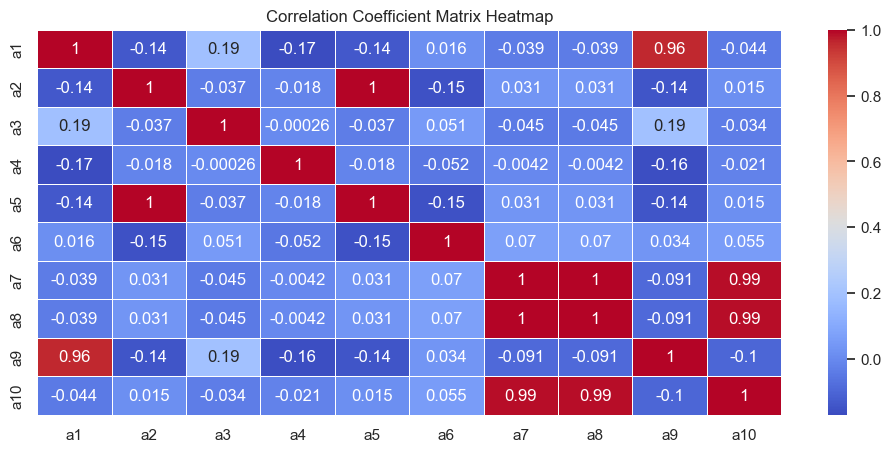

In [529]:
# For which attributes can we use a correlation-coefficient ?
coefficient_matrix = df.drop(columns=['a11', 'a12'], inplace=False).corr()
plt.figure(figsize=(12,5))
sns.heatmap(coefficient_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Coefficient Matrix Heatmap")
plt.show()

### Discussion
There are several features that are negatively correlated, meaning that as one increases, the other decreases. 
This suggests that these qualities are inversely related. We also find many cases of weak or no correlation, 
indicating the independence of these features.
The weaker or close to zero correlation coefficients indicate the absence of significant relationships.In conclusion, 
the dataset shows an inconsistent overall relationship. Some feature pairs, such as "a2" and "a5" or "a1" and "a9," 
have substantial relationships while the majority of attribute pairings only have weak or no correlations. 
Due to the manner these features were generated, which used either one or the other property in the calculation, 
there are substantial correlations between them.

Generate Chi-square Matrix and plot as a heatmap. Discuss how attributes are correlated.

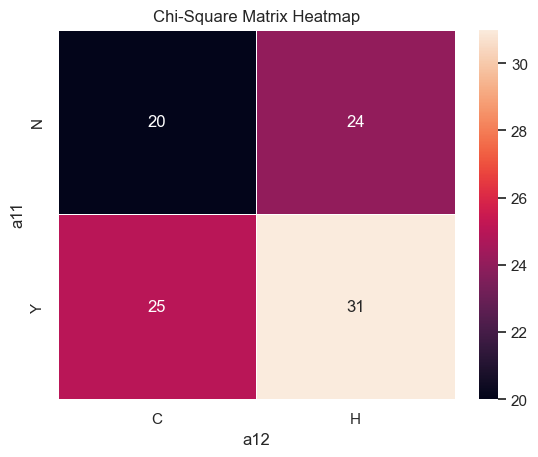

In [530]:
# Create a table for the two categorical attributes
table = pd.crosstab(df['a11'], df['a12'])

chi2, p, dof, expected = stats.chi2_contingency(table)

# Plot the Chi-square matrix as a heatmap
sns.heatmap(table, annot=True, linewidths=0.5)
plt.title("Chi-Square Matrix Heatmap")
plt.show()

### Discussion
The presence of darker colors in the cell on the heatmap indicates an obvious correlation between "a11" and "a12."
This shows that there is some sort of relationship between the two traits and that they are not independently related.
With only one notable exception, the dataset primarily displays weak correlations, therefore this is important to keep in mind.
The correlation between 'a11' (Y) and 'a12' (H), which is weakly correlated, is a special instance.

Generate Scatter-Plot Matrix and plot as a heatmap. Discuss how attributes are correlated.

In [531]:
categorical_columns = ['a11', 'a12']
non_categorical_df = df.drop(['a11', 'a12'], axis=1, inplace=False)
non_categorical_df.columns

Index(['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10'], dtype='object')

c:\Users\mfigu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


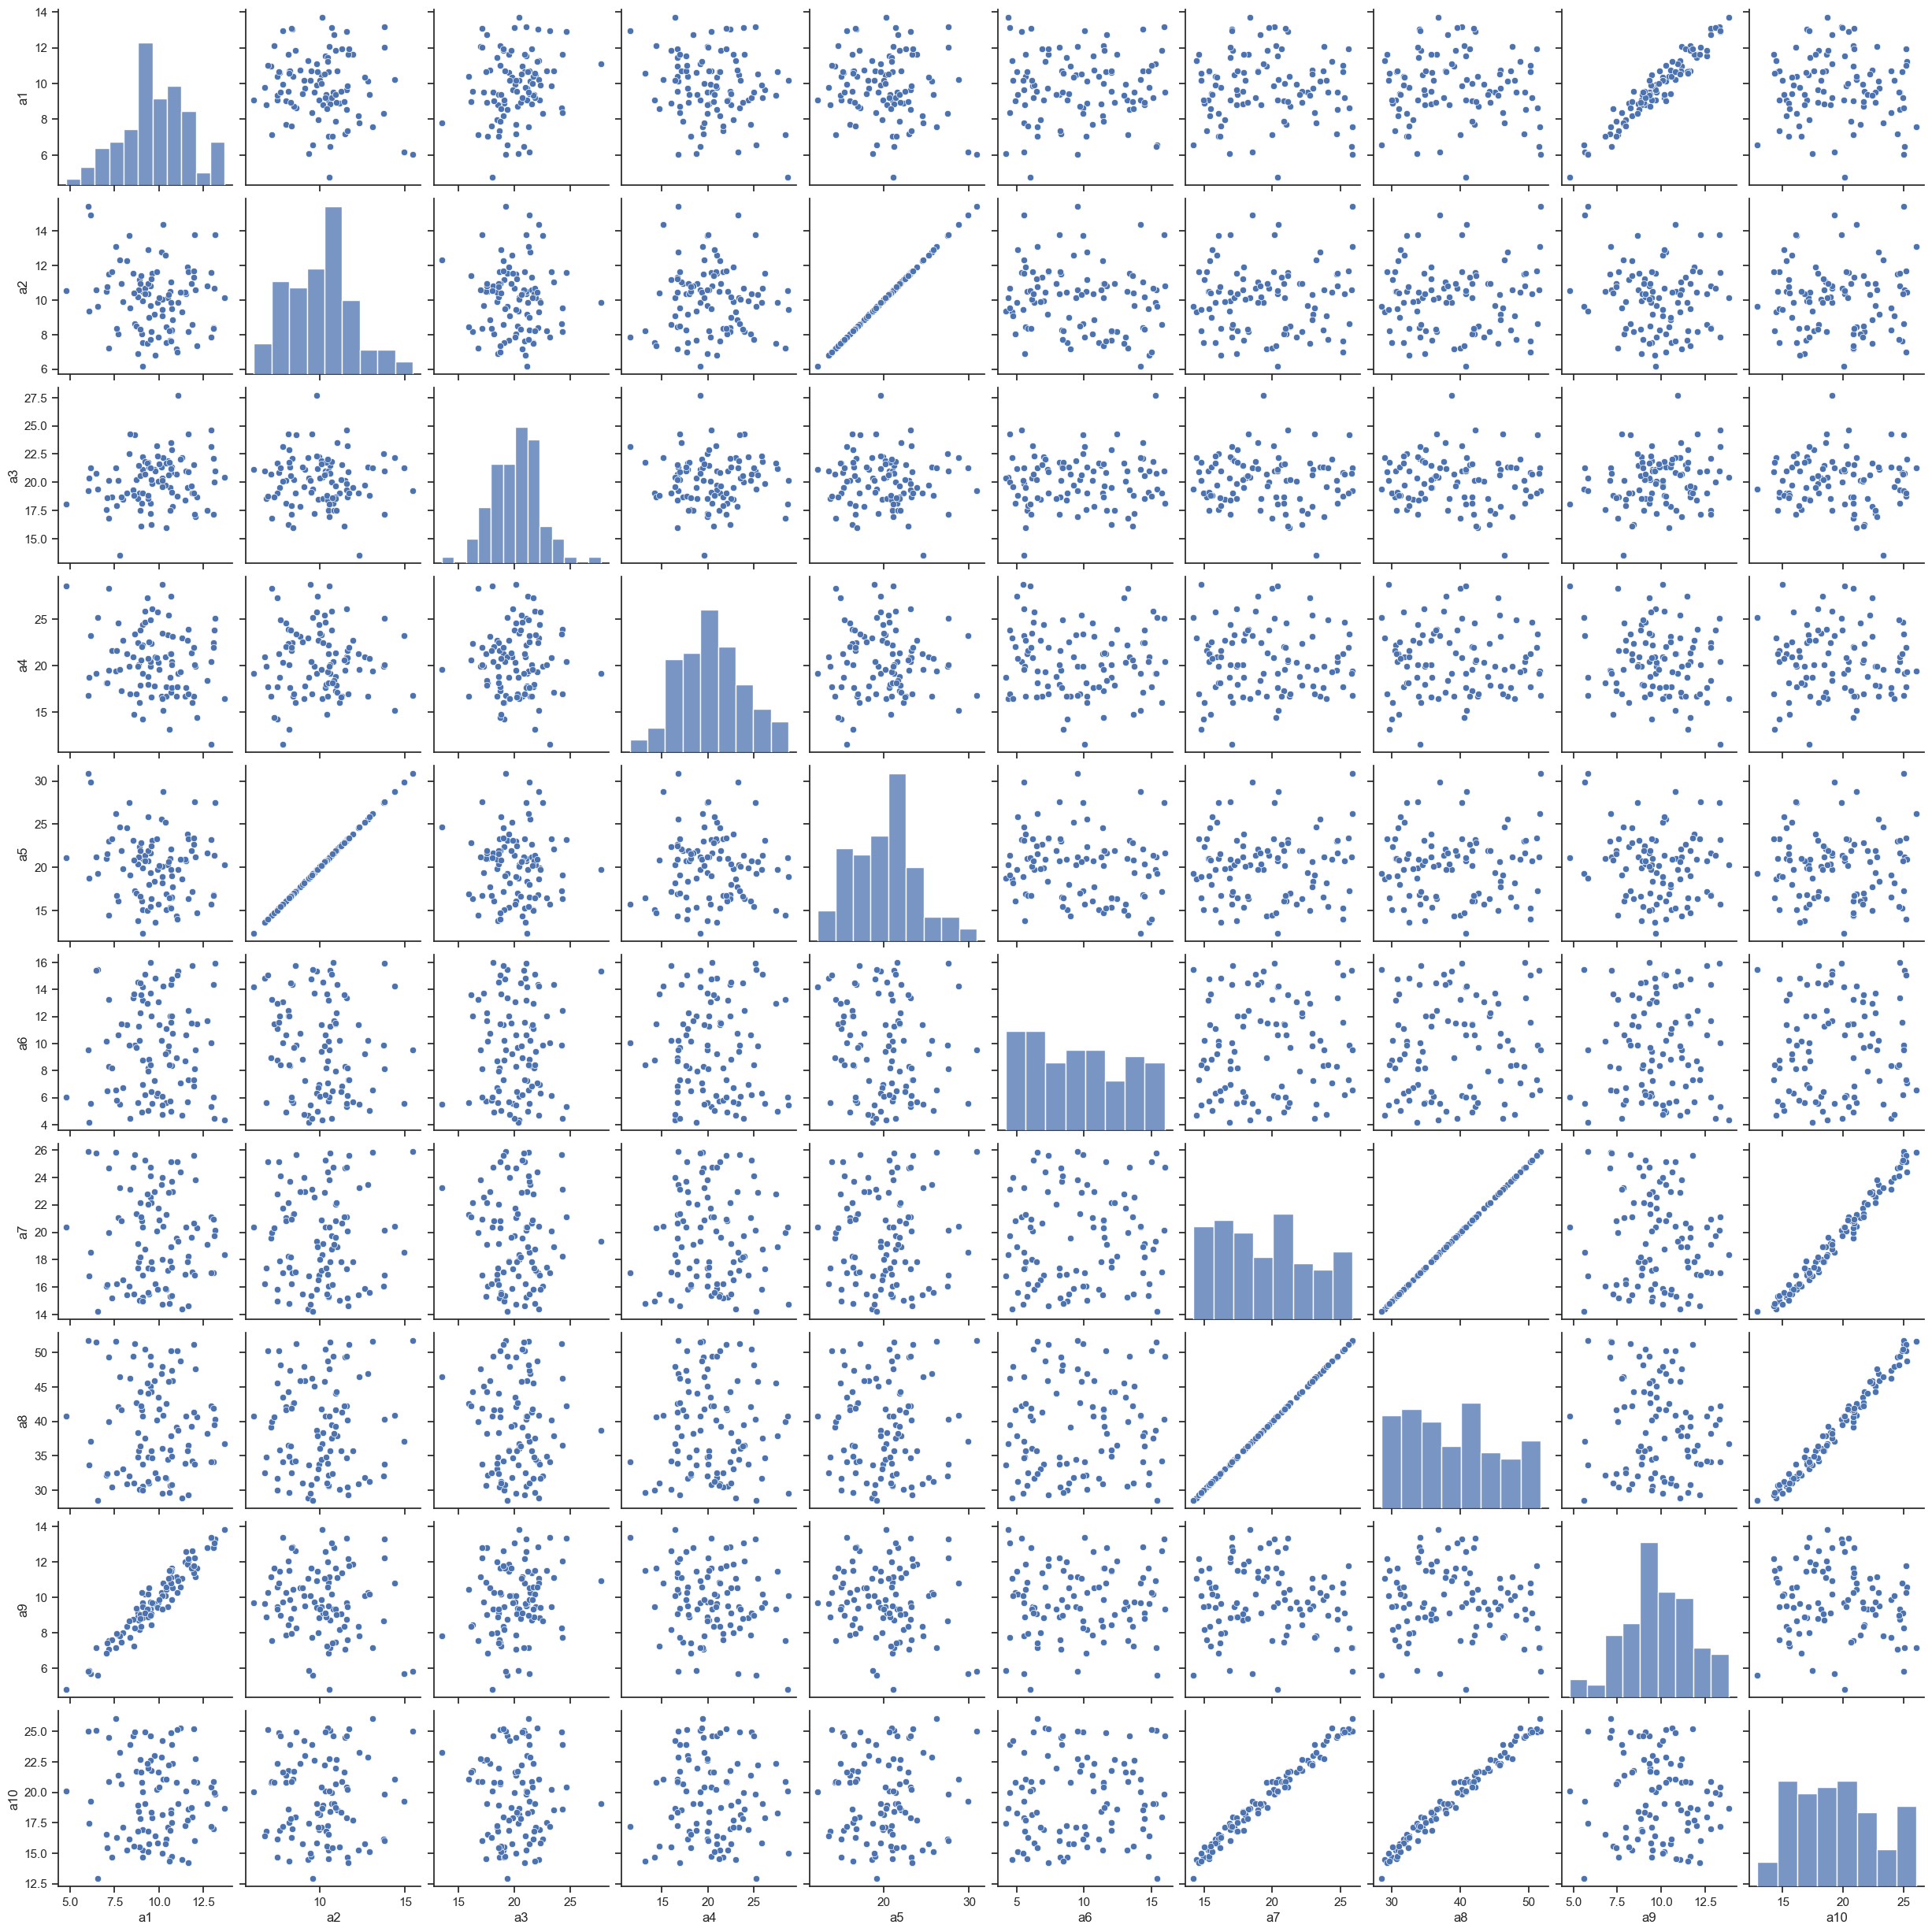

In [532]:
sns.set(style="ticks")
sns.pairplot(non_categorical_df, diag_kind="hist")
plt.show()

### Discussion

In this visualization, we can see several distinctive characteristics of the dataset.
- a7 and a8 share a very linear relationship. This makes sense because a8 holds the same values as a7 but multiplied by 2.
- Similarly, a10 and a7 share strong linearity, although, not as much as a7 and a8. This is due to the fact that a10 is essentially a7 but with additional noise. This goes for a9 and a2 as well.
- In relation to a4 and a5, the the a3 graphs show that the points are scattered slighty closer to each other than in the other graphs. This could imply that, since both have the same distribution but with different variances and means, there exists some sort of relation.

## Data Reduction

Apply PCA. Discuss outcome of PCA analysis and how you can use outcome of PCA analysis for data reduction.

In [533]:
data = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10]
df = pd.DataFrame(data)
#Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.682793,-0.808929,-0.646168,-0.706824,-0.941192,-0.982126,-0.988394,-0.826517,-1.182693,-0.964189,...,-0.709361,-0.758880,-1.080938,-0.926133,-0.887342,-1.097115,-0.692622,-0.906991,-0.940536,-0.829873
1,-1.120937,-0.861109,-0.931000,-1.396937,-0.926636,-0.867591,-0.911160,-0.965722,-0.959549,-1.112643,...,-0.802845,-0.777859,-0.799776,-1.095425,-0.795790,-0.610236,-1.072698,-0.927692,-0.928897,-0.983853
2,0.431096,0.244184,0.916999,0.637836,-0.170816,-0.211072,0.001859,0.287944,0.654120,1.035273,...,0.098022,-0.160619,0.488123,0.212945,0.043765,0.422540,1.112288,0.066288,0.332655,0.164170
3,-0.030809,-0.066471,1.035353,0.687381,0.096039,-0.000648,0.515198,-0.110501,0.831876,0.010993,...,-0.175194,0.089084,-0.141351,0.731716,0.367979,0.357904,-0.281097,0.529267,0.104238,0.477086
4,-0.299538,-0.014902,0.408398,-0.151121,0.039952,0.102268,0.821405,0.249288,0.654136,0.072466,...,-0.019764,0.212336,0.800406,-0.403145,0.042039,0.807956,0.253132,0.066317,0.179979,-0.330048
5,-0.913725,-1.034608,-1.597935,-0.509372,-0.519384,-0.402003,-0.636001,-0.928620,-0.543241,-0.452656,...,-1.178954,-1.149010,-0.301650,-0.591041,-1.130400,-1.170954,-1.038333,-0.975252,-0.786112,-0.923431
6,0.297601,0.414935,-0.193955,-0.115752,0.360103,0.382803,-0.110095,0.212547,-0.227380,0.032373,...,0.474961,0.394495,-0.022812,0.311709,0.411895,0.101341,-0.015281,0.286052,0.252415,0.405102
7,2.537539,2.537186,1.882487,2.411250,2.613431,2.603057,2.423534,2.605825,2.118475,2.362498,...,2.535846,2.557044,2.354334,2.411124,2.457409,2.231110,2.367968,2.493805,2.542601,2.447861
8,-0.663453,-0.827956,-0.681226,-0.738918,-0.921493,-1.001015,-0.970167,-0.704689,-1.115850,-0.983800,...,-0.719926,-0.770408,-1.287853,-0.928636,-0.896692,-1.051280,-0.543732,-0.852670,-0.955273,-0.876765
9,0.445019,0.417671,-0.192954,-0.117542,0.369996,0.376326,-0.146179,0.180446,-0.229893,-0.000315,...,0.497217,0.363818,-0.008483,0.276886,0.387136,0.008732,-0.089625,0.220876,0.198931,0.449752


In [534]:
pca_1 = PCA(n_components = 2)
X_pca_1 = pca_1.fit_transform(df_scaled)
X_pca_1

array([[-8.98809954, -0.75279325],
       [-8.81271098,  0.90807382],
       [ 2.98066245,  1.18378386],
       [ 3.1605981 ,  2.64311036],
       [ 2.84955433,  3.50060803],
       [-9.14531007, -1.7724431 ],
       [ 1.62076755, -1.64403846],
       [23.7165114 , -1.60361652],
       [-8.93823824, -0.73360413],
       [ 1.55626499, -1.72908062]])

In [535]:
pca_1.explained_variance_ratio_
#first component explains 91% variance second component explains 0.33%

array([0.91649406, 0.03397683])

In [536]:
pca_1.explained_variance_ratio_.sum()
#95% variance explained

0.950470884194105

### Discussion
We were able to reduce the data set of hundreds of features to just two components which makes it easier to explore 
and analyze. With this dimensionality reduction, we can now consider clustering the data,
allowing for a more focused analysis and the identification of potential outliers within the dataset.
which helps to remove noisy data

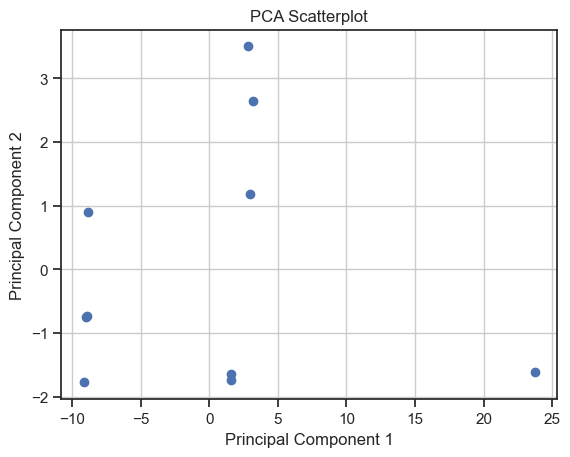

In [537]:
plt.scatter(X_pca_1[:, 0], X_pca_1[:, 1])
plt.title("PCA Scatterplot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

- https://seaborn.pydata.org/generated/seaborn.histplot.html
- https://datatofish.com/correlation-matrix-pandas/
- https://pythonfordatascienceorg.wordpress.com/chi-square-python/#scipy_stats
